## 4.1 Introduction to Machine Learning

### Lingo:
* **features**
* **instances**
* **target** 

### Supervised vs Unsupervised

## 4.2 Factor Analysis

### Assumptions:
1. features metric
2. continuous/ordinal
3. r > 0.3 correlation coeff
4. n > 100 obs/ > 5 obs per feature
5. sample is homogeneous

**latent** variable -- hidden features

In [1]:
import numpy as np, pandas as pd, sklearn as sk, sklearn.decomposition as skd
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets

### factor analysis on `iris`

In [2]:
iris = datasets.load_iris()
X, y, variable_names = iris.data, iris.target, iris.feature_names
X[:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [6]:
pd.DataFrame(X, columns=variable_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
factor = FactorAnalysis().fit(X)

pd.DataFrame(factor.components_, columns=variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.70699,-0.15800,1.65424,0.70085
1,0.11516,0.15964,-0.04432,-0.01403
2,-0.00000,0.00000,0.00000,0.00000
3,-0.00000,0.00000,0.00000,-0.00000


## 4.3 Principal Component Analysis

### Singular Value Decomposition
* linear algebra method decomposing a matrix into 3 resulting matrices to reduce redundancy/noise
* most commonly used for PCA

### Principal Components 
* **principal components**-uncorrelated features that embody a dataset's important information ('variance') with the redundancy, noise, aand outliers stripped out
* unsupervised ML algo 
* decompose data into single vector with the principal 'information'

In [22]:
import numpy as np, pandas as pd, sklearn as sk, matplotlib.pyplot as plt, seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML

In [23]:
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [24]:
sb.set_style('whitegrid')

In [25]:
iris = datasets.load_iris()
X, col = iris.data, iris.feature_names
X[:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

1. instantiate PCA object
2. call `.fit()` method
3. apply dimensionality reduction on `X` by calling `.transform()`

In [26]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

#how much variance explained by what we have
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [28]:
# this should be one
pca.explained_variance_ratio_.sum()

1.0

### explained variance ratio
* tells us how much information is compressed into the first few components
* calculate a 'cumulative variance'
* this cum variance tells you how much to keep
* want to keep at least 70% of the dataset's original information

* above, summing up EVR gives the 'cumulative variance' of 100%
    * but, don't want 100%--some of that info is redundant
    
#### goal of PCA:
* remove the less-useful data

#### looking at array of EVR:
* first component EVR is 92.5% -- so this has 92.5% of the data's infomation in a single compoonent
* by including the first two components, we have 97.8% of the info, so take only these two

In [29]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.36139,-0.08452,0.85667,0.35829
1,0.65659,0.73016,-0.17337,-0.07548
2,-0.58203,0.59791,0.07624,0.54583
3,-0.31549,0.31972,0.47984,-0.75366


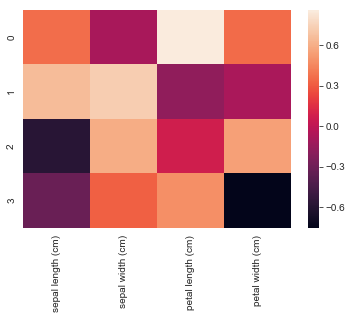

In [30]:
# want to show correlations
sb.heatmap(comps); plt.show()